In [10]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [11]:
# ARIMA = AR +I+ MA

In [12]:
#AutoRegression is done by PACF; PACF gives us the K value(nb of lags)

In [13]:
#In the PACF, there is an upper and lower bond, if any of timestamps are crossing the bound, it means that this timestamp has some kind of impact on the current timestamp(there's a correlation) 
#p=nb of timestamps that have crossed the bounds; calculated on PACF plot;AR
# d= nb of time you are basically differencing  
#q: calculated on ACF plot;MA


In [14]:
#Moving Average is done by ACF

In [15]:
#Integrated is done by Differencing 

In [16]:
#ARIMA (works good for stationary data)
#1.Check the data for stationary  : stationnary data : -mean should be constant & Std Deviation should be constant too ,   
    # Hypothesis Dickey Fuller Test
        #Ho: unit=1 => Data is not stationnary; p-value>= 0,5 => We do differencing(shift 1) , then give the differencing data to Dickey Test
        #H1: unit<1 => Data is stationnary ; p-value < 0,5

In [17]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [18]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [19]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [20]:
df_airline.dropna(axis=0,inplace=True)

In [21]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [22]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [23]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [24]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [11]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [25]:
df_airline.set_index('Month',inplace=True)

In [26]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

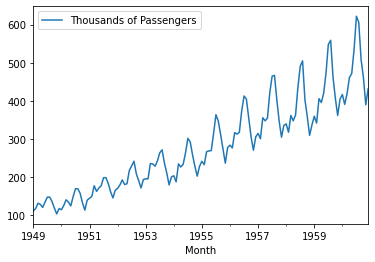

In [14]:
df_airline.plot()

In [27]:
#The graph is moving up and down, so this is a seasonal data , & based on that you can find out some kind of trend


In [28]:
#If it is a seasonal data, it can't be a stationary data

In [50]:
#For SEASONAL Data , we should use use SArimax only

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [31]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060512
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [32]:
#We'll try to make our data stationnary by differecing

In [33]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [34]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [35]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699976
p- value: 0.054213290283825745
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [37]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)


In [22]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468527
p- value: 2.732891850014085e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [41]:
### We have a seasonal data , so we should be sure to do 12 months, so do it for 12 times 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [39]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [44]:
#Since i've got 0,01 , that means that seasonal difference can also be applied and get it stationnary


In [48]:
#let's now select our q value from acf


In [46]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

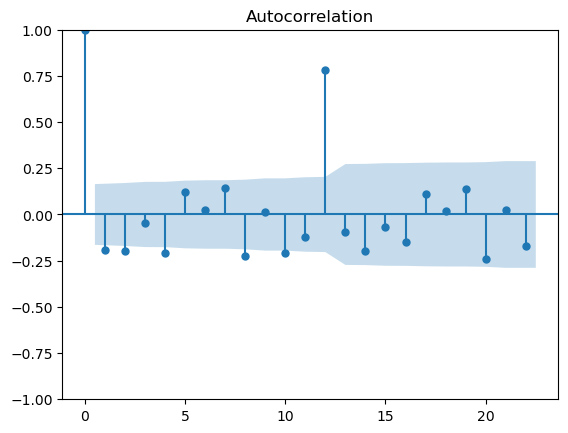

In [47]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

In [49]:
#q=13

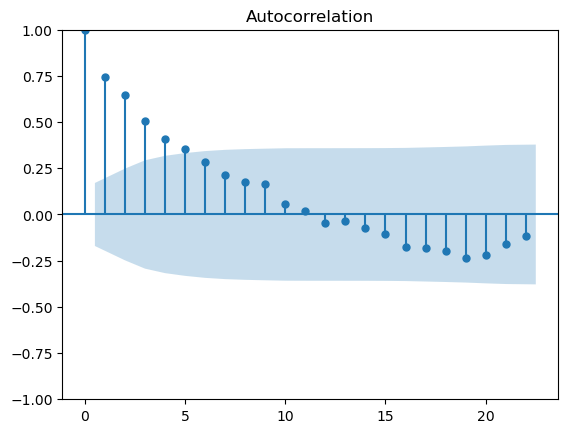

In [53]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
#pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [54]:
#q=5(first one is 0 we don't count it) , that are acceeded the upper bound; that means that i can consider the five previous seasonal data because all others have no impact 

In [55]:
#let's find p value on pacf

/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


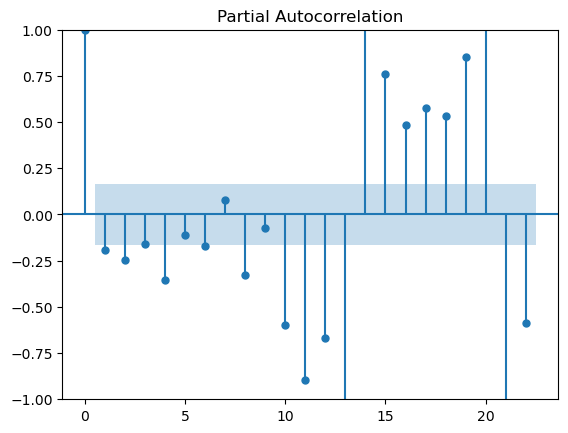

In [56]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

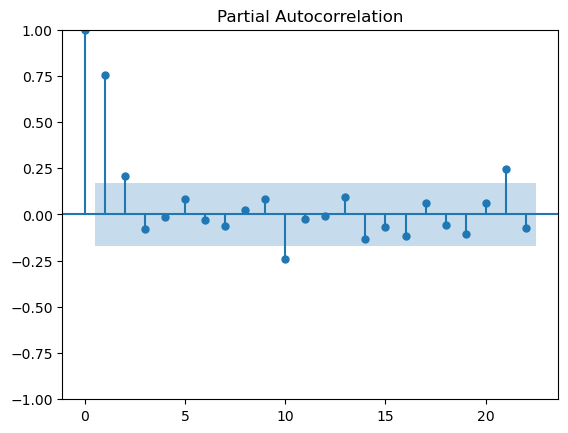

In [57]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [59]:
#p=2 (first try)
#p=10 (second try) ; if one line is going outside the bound, we count all the ones before 


In [60]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [68]:
df_airline.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0
1960-11-01,390.0,-71.0,-24.0,28.0
1960-12-01,432.0,42.0,113.0,27.0


In [61]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [62]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [63]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [64]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [65]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [66]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [69]:
import statsmodels.api as sm

/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


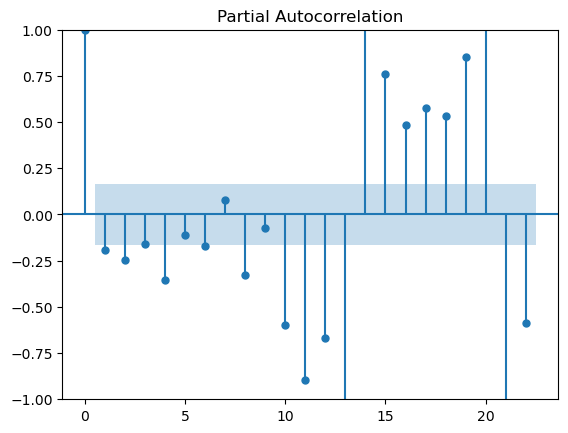

In [75]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

In [77]:
#we can start from p=10(the points before the first too long point)
#we did differencing 2 times , so d=2

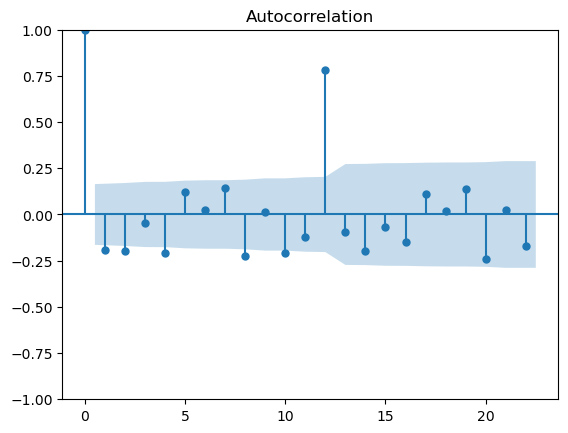

In [78]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

In [101]:
#q=12 ; but we're on ARIMA and for seasonal data , you can't take 12 months


In [191]:
model_ARIMA = sm.tsa.ARIMA(train_data['Thousands of Passengers'], order=(10, 2, 0)).fit()


/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [192]:
#p value is taken as 14 

In [193]:
#model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(0,2,0))

In [194]:
model_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Thu, 16 Feb 2023   AIC                            736.477
Time:                             00:51:00   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [195]:
#for p-value on summary , whenever it's <0,05 , that means that the feature has a good impact


In [196]:
#so here,all our features have an impact on date which is what we trying to predict
#and so we have 10 lags 

In [197]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,292.466553,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,280.471026,NaN
1956-03-01,317.0,40.0,47.0,50.0,269.560236,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,249.068698,NaN
1956-05-01,318.0,5.0,9.0,48.0,250.360156,NaN
1956-06-01,374.0,56.0,51.0,59.0,256.879762,NaN
1956-07-01,413.0,39.0,-17.0,49.0,252.711078,403.398436
1956-08-01,405.0,-8.0,-47.0,58.0,247.800406,385.071786
1956-09-01,355.0,-50.0,-42.0,43.0,238.544759,349.445859


In [198]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [199]:
pred=model_ARIMA.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [200]:
pred

1956-01-01    300.183612
1956-02-01    309.478354
1956-03-01    316.443014
1956-04-01    307.827542
1956-05-01    318.544231
1956-06-01    348.922080
1956-07-01    366.020285
1956-08-01    346.567532
1956-09-01    332.120967
1956-10-01    307.734753
1956-11-01    311.623910
1956-12-01    339.828195
1957-01-01    349.840404
1957-02-01    356.098231
1957-03-01    350.687825
1957-04-01    350.080460
1957-05-01    361.157690
1957-06-01    381.216513
1957-07-01    382.319371
1957-08-01    372.852577
1957-09-01    364.110094
1957-10-01    356.108922
1957-11-01    371.293787
1957-12-01    385.323593
1958-01-01    392.077835
1958-02-01    391.405848
1958-03-01    388.404577
1958-04-01    391.572853
1958-05-01    402.448076
1958-06-01    413.255681
1958-07-01    410.853412
1958-08-01    407.670540
1958-09-01    402.486332
1958-10-01    406.089144
1958-11-01    418.125310
1958-12-01    426.012372
1959-01-01    429.205577
1959-02-01    427.352228
1959-03-01    428.150984
1959-04-01    432.790843


In [201]:
residuals

Month
1956-01-01    -16.183612
1956-02-01    -32.478354
1956-03-01      0.556986
1956-04-01      5.172458
1956-05-01     -0.544231
1956-06-01     25.077920
1956-07-01     46.979715
1956-08-01     58.432468
1956-09-01     22.879033
1956-10-01     -1.734753
1956-11-01    -40.623910
1956-12-01    -33.828195
1957-01-01    -34.840404
1957-02-01    -55.098231
1957-03-01      5.312175
1957-04-01     -2.080460
1957-05-01     -6.157690
1957-06-01     40.783487
1957-07-01     82.680629
1957-08-01     94.147423
1957-09-01     39.889906
1957-10-01     -9.108922
1957-11-01    -66.293787
1957-12-01    -49.323593
1958-01-01    -52.077835
1958-02-01    -73.405848
1958-03-01    -26.404577
1958-04-01    -43.572853
1958-05-01    -39.448076
1958-06-01     21.744319
1958-07-01     80.146588
1958-08-01     97.329460
1958-09-01      1.513668
1958-10-01    -47.089144
1958-11-01   -108.125310
1958-12-01    -89.012372
1959-01-01    -69.205577
1959-02-01    -85.352228
1959-03-01    -22.150984
1959-04-01    -36.7

<AxesSubplot:ylabel='Density'>

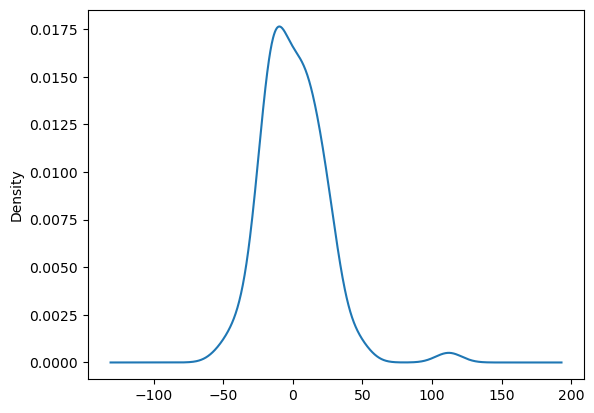

In [202]:
model_ARIMA.resid.plot(kind='kde')

In [203]:
#seems like a normal distribution which very good, probably because we're not taking specifically the q value


In [204]:
test_data['Predicted_ARIMA']=pred

/var/folders/cp/zzchzjw14jb8x0ffxgyywy3m0000gp/T/ipykernel_24930/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

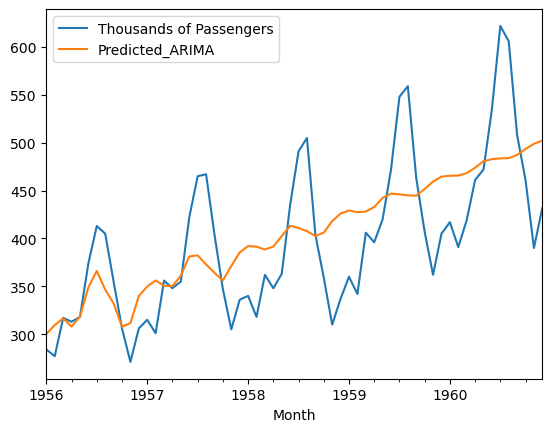

In [205]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [218]:
#Arima don't work with seasonal data, it may work with Stock data

/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


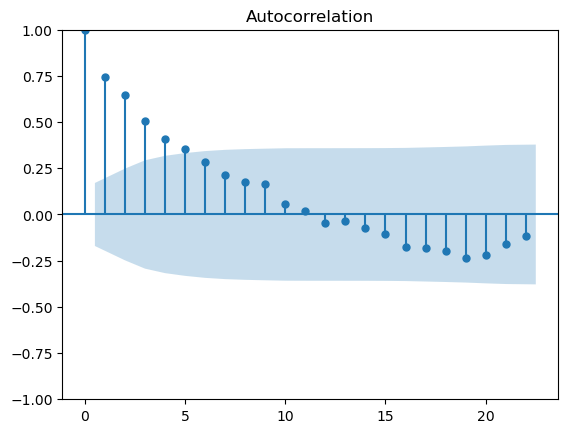

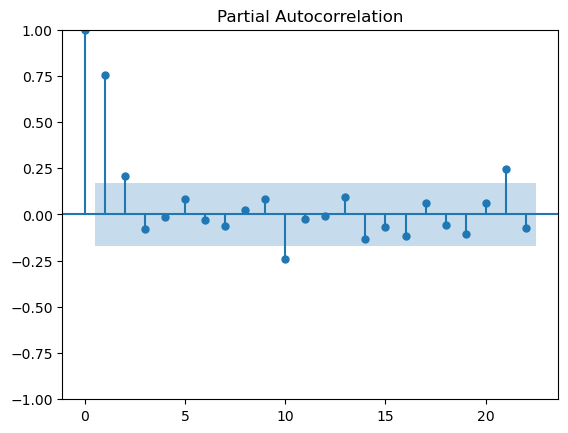

In [117]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [132]:
#3
#5

In [118]:
## create a SARIMA model #to work correctly with seasonal data
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [133]:
#here we see graphs of Passengers Twelve differences

In [206]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(1,1,1,12))


/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [207]:
#12 is the nb of months
# differencing have been done 1 time for seasonal
#1,1,1 or 0,1,0

In [208]:
model_SARIMA_fit=model_SARIMA.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19317D+00    |proj g|=  5.08695D-02

At iterate    5    f=  3.17407D+00    |proj g|=  8.98775D-03

At iterate   10    f=  3.17102D+00    |proj g|=  2.14445D-03

At iterate   15    f=  3.16818D+00    |proj g|=  5.35554D-02

At iterate   20    f=  3.15605D+00    |proj g|=  2.58774D-02

At iterate   25    f=  3.15310D+00    |proj g|=  1.93208D-03

At iterate   30    f=  3.15236D+00    |proj g|=  5.22769D-02

At iterate   35    f=  3.14836D+00    |proj g|=  1.29607D-02

At iterate   40    f=  3.14398D+00    |proj g|=  1.07915D-02

At iterate   45    f=  3.14202D+00    |proj g|=  7.41512D-03

At iterate   50    f=  3.14184D+00    |proj g|=  2.02570D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [209]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(1, 1, [1], 12)   Log Likelihood                -263.914
Date:                              Thu, 16 Feb 2023   AIC                            549.829
Time:                                      00:54:25   BIC                            574.872
Sample:                                  01-01-1949   HQIC                           559.799
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5577      3.406      0.164      0.870      -6.118       7.233
ar.L2          0.8514      0.387      2.202      0.028       0.094       1.609
ar.L3         -0.4201      3.099     -0.136      0.892      -6.494       5.654
ma.L1          0.2021      3.319      0.061      0.951      -6.303       6.707
ma.L2         -0.5165      2.447     -0.211      0.833      -5.313       4.280
ma.L3         -0.0927      0.720     -0.129      0.898      -1.505       1.319
ma.L4         -0.1898      0.548     -0.347      0.729      -1.263       0.884
ma.L5          0.1671      0.936      0.178      0.858      -1.668       2.002
ar.S.L12      -0.3128      0.867     -0.361      0.718      -2.013       1.387
ma.S.L12       0.1056      0.954      0.111      0.912      -1.763       1.975
sigma2        84.0883     32.839      2.561      0.010      19.724     148.452
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.88
Prob(Q):                              0.93   Prob(JB):                         0.39
Heteroskedasticity (H):               2.41   Skew:                             0.40
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [210]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,483.883977,460.264051
1960-09-01,508.0,-98.0,-82.0,45.0,487.184100,422.851377
1960-10-01,461.0,-47.0,51.0,54.0,493.432781,381.664274
1960-11-01,390.0,-71.0,-24.0,28.0,498.930070,342.295214
1960-12-01,432.0,42.0,113.0,27.0,502.159822,380.320617


In [211]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [212]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<AxesSubplot:xlabel='Month'>

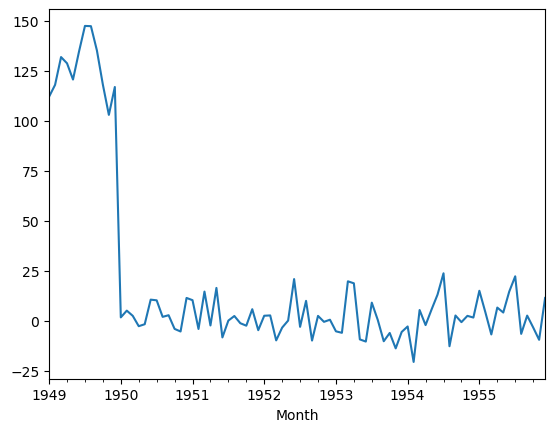

In [213]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

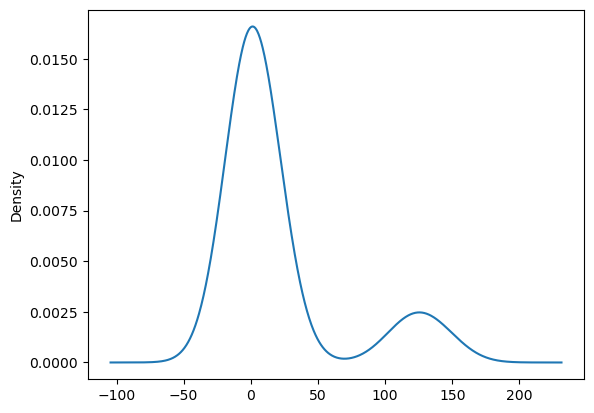

In [214]:
model_SARIMA_fit.resid.plot(kind='kde')

In [215]:
test_data['Predicted_SARIMA']=pred_Sarima

/var/folders/cp/zzchzjw14jb8x0ffxgyywy3m0000gp/T/ipykernel_24930/1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [216]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183612,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,309.478354,NaN
1956-03-01,317.0,40.0,47.0,50.0,316.443014,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,307.827542,NaN
1956-05-01,318.0,5.0,9.0,48.0,318.544231,NaN
1956-06-01,374.0,56.0,51.0,59.0,348.922080,NaN
1956-07-01,413.0,39.0,-17.0,49.0,366.020285,398.953533
1956-08-01,405.0,-8.0,-47.0,58.0,346.567532,382.896204
1956-09-01,355.0,-50.0,-42.0,43.0,332.120967,347.485346


<AxesSubplot:xlabel='Month'>

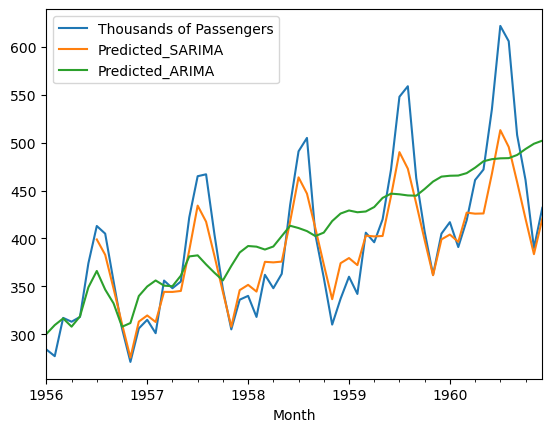

In [217]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()